In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtik
import seaborn as sns
df = pd.read_csv("D:\mllearnprojects\eda\CustomerChurn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()
####so as we can see TotalCharges is object which shouldn't be the case 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


so using this method first check what is average,25%,50%(median),75% and also standard devation
1.if mean and median are very far it means data has good chunk of outliars 

In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [8]:
new_df = df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges ,errors ='coerce')
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

(11/7043)*100 is just 0.15% of the data we can ignore these rows

In [10]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
new_df.dropna(how='any',inplace=True)

In [12]:
#### as we can see tenure is a group of a lot of continuous values 
#### so we will be performing feature beaning for tenure
print(new_df['tenure'].max())

72


In [13]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
print(labels)
new_df['tenure_group']=pd.cut(new_df.tenure,range(1,80,12),right = False ,labels = labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [14]:
new_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [15]:
#### dropping useless columns 
new_df.drop(columns = ['customerID','tenure'],axis=1,inplace=True)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


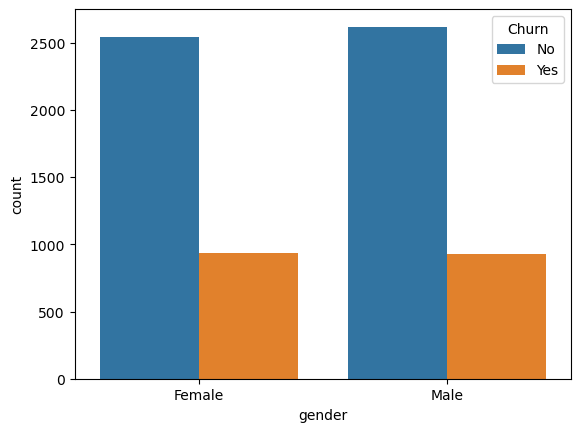

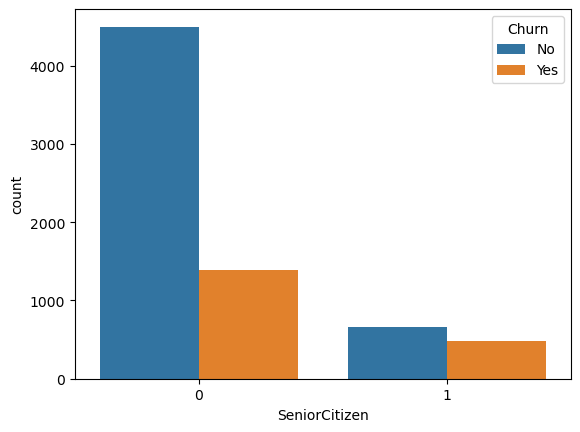

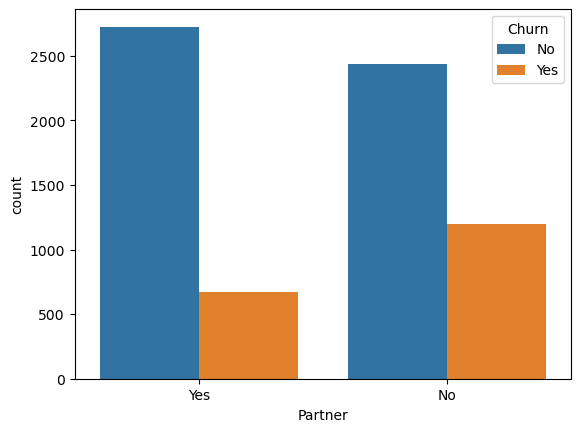

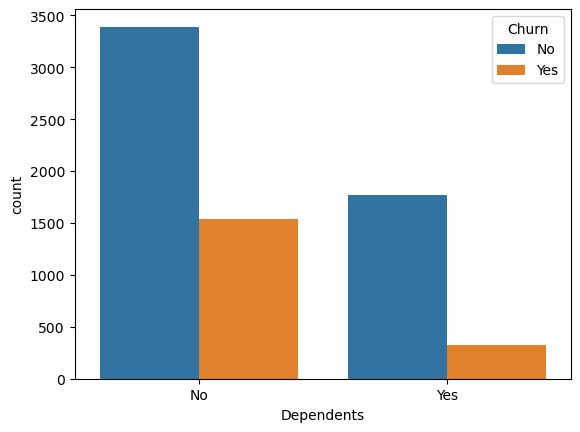

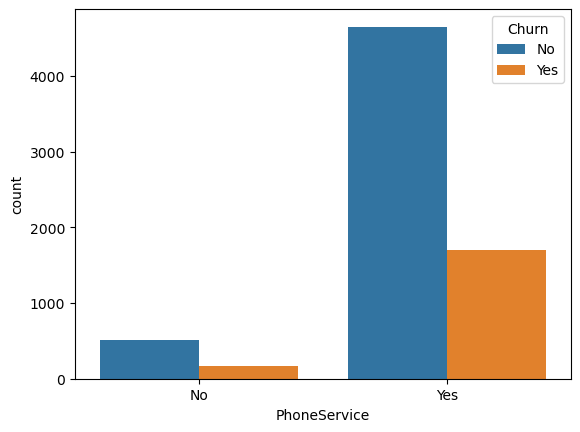

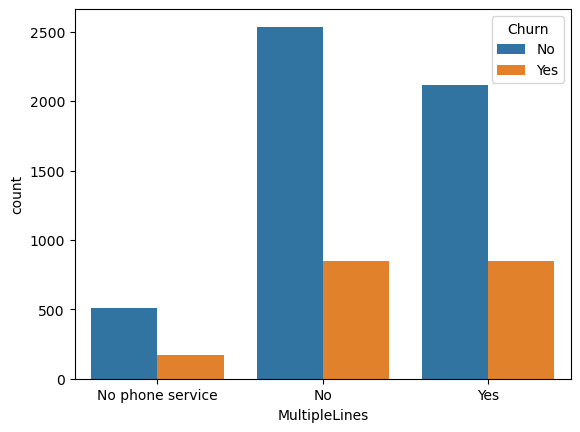

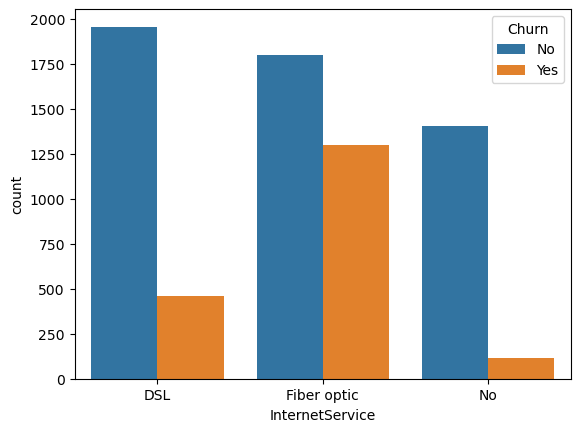

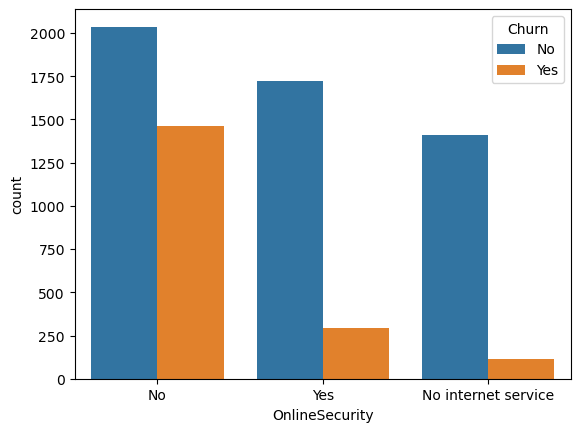

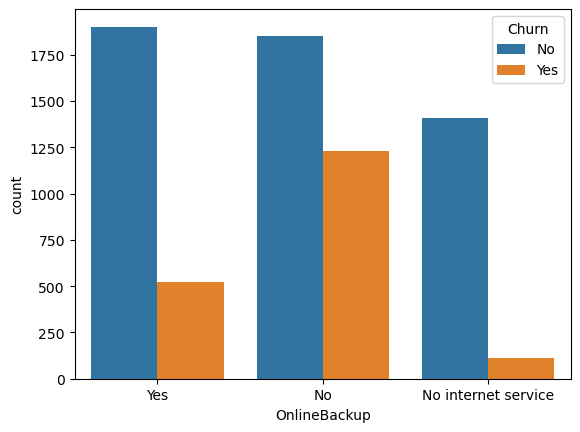

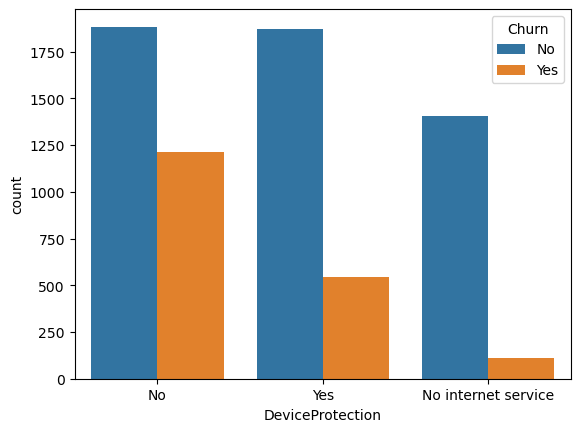

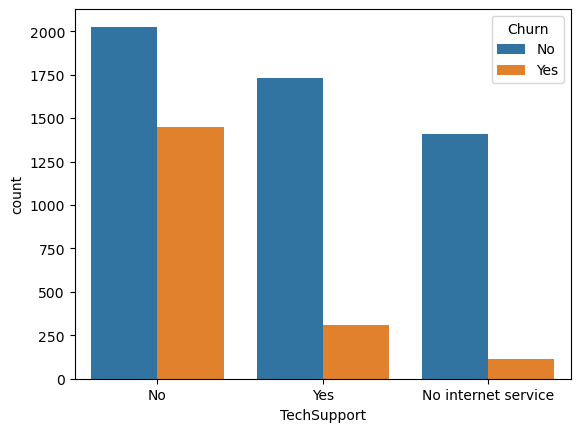

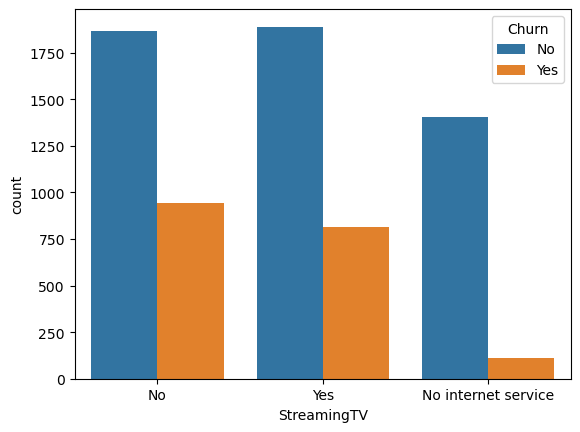

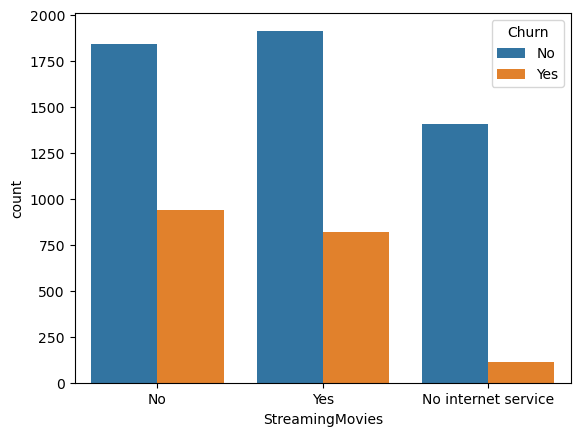

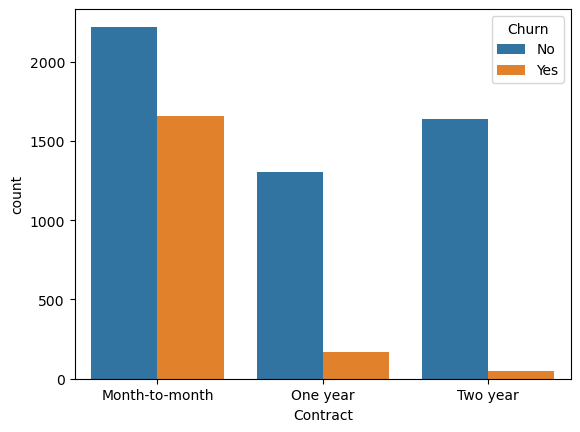

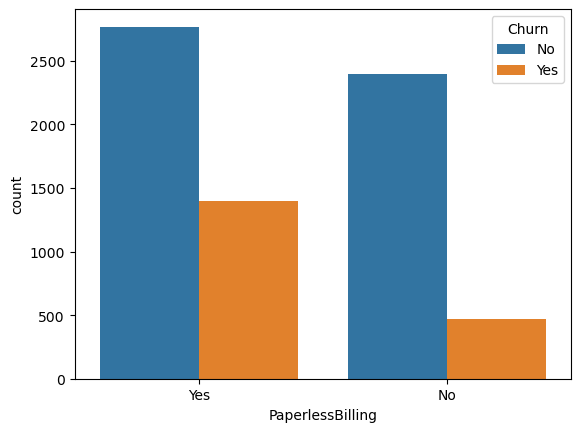

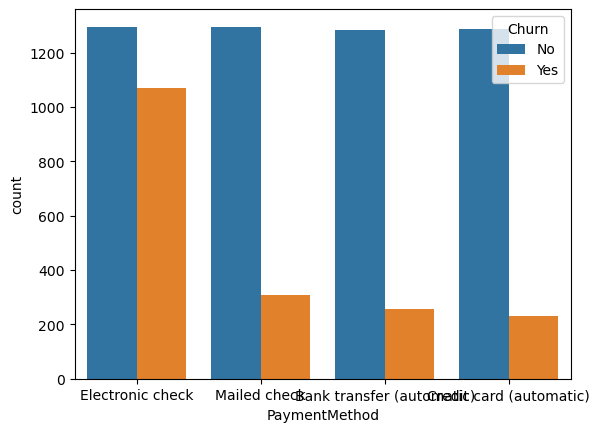

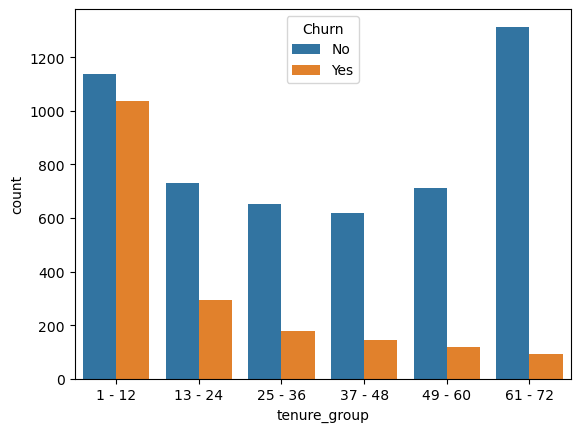

In [16]:
for i , predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor,hue ='Churn')

#######observations from unvariant analysis
1. older people are churners
2. singles are more likely to be churners
3. non dependents are churners
4. people with single Lines and no phone service are less likely to be churners
5. people using fiber optic are just not happy at all
6. in contrast dsl user are less likely to churn
7. people using neither fiber optic nor dsl are least likely to churn
   #### like this take a lot of insights from univariate analysis

In [17]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.shape

(7032, 52)

In [21]:
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,True,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,True,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,True,False,False,True,True,False,False,False,False,False


<Axes: >

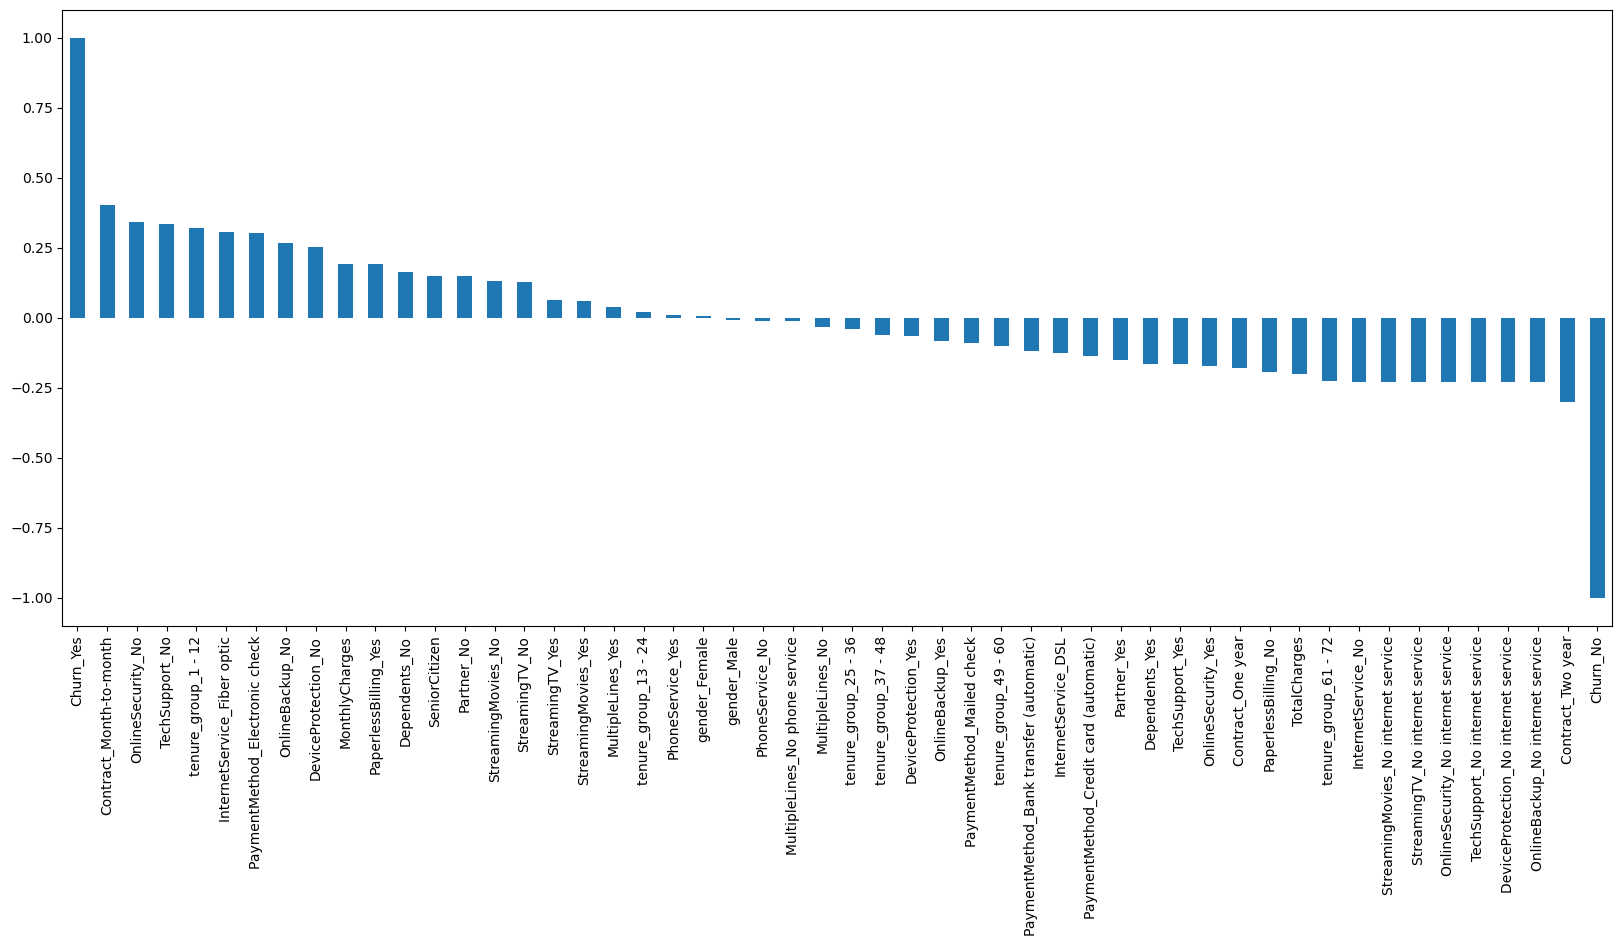

In [26]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

can make observation using this graph keep required features

features which are numerical in nature we can plot graph below given

C:\Users\chira\AppData\Local\Temp\ipykernel_15764\3528242404.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_df.TotalCharges[(new_df["Churn"]=="No")],
C:\Users\chira\AppData\Local\Temp\ipykernel_15764\3528242404.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_df.TotalCharges[(new_df["Churn"]=="Yes")],


Text(0.5, 1.0, 'TotalCharges by churn')

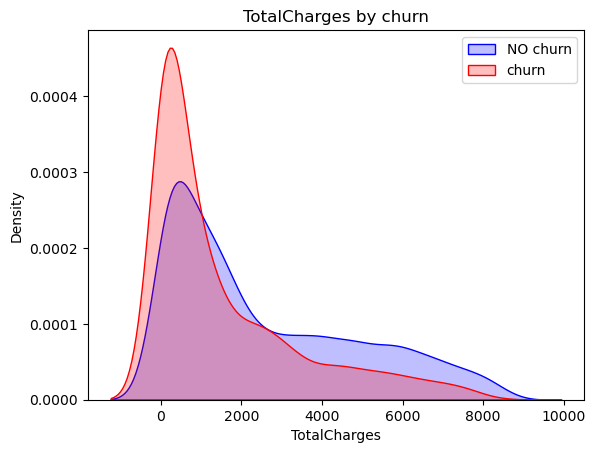

In [30]:
tot = sns.kdeplot(new_df.TotalCharges[(new_df["Churn"]=="No")],
                  color = 'Blue',shade='True')
tot = sns.kdeplot(new_df.TotalCharges[(new_df["Churn"]=="Yes")],
                  color = 'Red',shade='True')
tot.legend(["NO churn","churn"],loc="upper right")
tot.set_ylabel('Density')
tot.set_xlabel('TotalCharges')
tot.set_title("TotalCharges by churn")

C:\Users\chira\AppData\Local\Temp\ipykernel_15764\911140185.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"]=="No")],
C:\Users\chira\AppData\Local\Temp\ipykernel_15764\911140185.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"]=="Yes")],


Text(0.5, 1.0, 'Monthlycharges by churn')

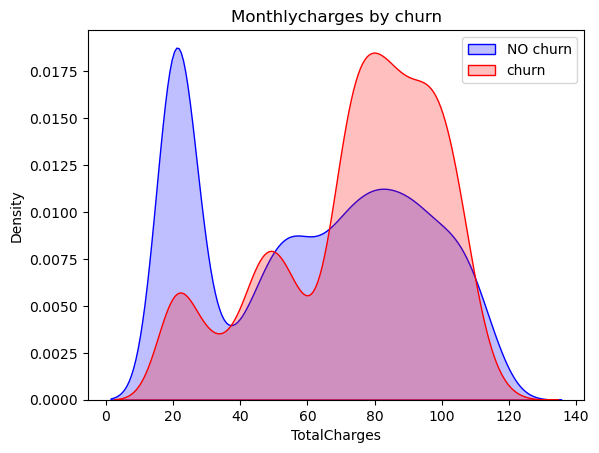

In [32]:
tot = sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"]=="No")],
                  color = 'Blue',shade='True')
tot = sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"]=="Yes")],
                  color = 'Red',shade='True')
tot.legend(["NO churn","churn"],loc="upper right")
tot.set_ylabel('Density')
tot.set_xlabel('TotalCharges')
tot.set_title("Monthlycharges by churn")

further analysis can be made for getting more insights about data but this is enough for our project
